In [ ]:
#hide
from topological_mott_insulator.core import *
from matplotlib import pyplot as plt
from matplotlib import transforms
from matplotlib.collections import LineCollection
import matplotlib.colors as colors
import matplotlib as mpl
from scipy.interpolate import interp1d
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import numpy as np

# Welcome to the Topological Mott Insulator toolbox

> A Hartree-Fock library to study an interaction-induced Chern Insulator in the checkerboard lattice.

(under development)

## Install

`to be released`

## How to use

Perform a simple self-consistent algorithm to compare unrestricted and restricted Hartree-Fock results

In [ ]:
nx, ny = 20, 6
t0 = -1
jax, jay, jbx, jby = 0.5, -0.5, -0.5, 0.5
v1, v2 = 2.5, 1.5
cf = (nx*ny)/(nx*ny)
phix, phiy = 0., 0.
beta = 1E+5

un_mf = checkerboard_lattice_un(nx=nx,ny=ny,t0=-1, jax=jax, jay=jay, 
		                        jbx=jbx, jby=jby, v1=v1, v2=v2,
		                        beta=beta, cell_filling=cf, phix=phix, phiy=phiy, cylinder=True, field=0.0*1j, induce='nothing', border=True)

re_mf = checkerboard_lattice_4unitcell(nx=nx,ny=ny,t0=t0,jax=jax, jay=jay, 
		                        jbx=jbx, jby=jby, v1=v1, v2=v2,  
		                        beta=beta, cell_filling=cf)

for i1 in (range(0,400)):
        un_mf.iterate_mf(eta=0.6)
        re_mf.iterate_mf()

for i1 in (range(0,400)):
        un_mf.iterate_mf(eta=1.)
        re_mf.iterate_mf()

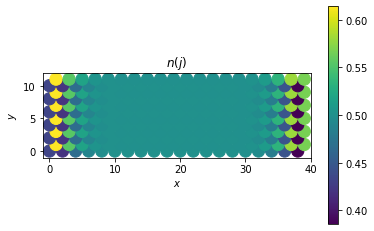

In [ ]:
fig  = plt.figure()
ax = fig.add_subplot()
sc = ax.scatter(un_mf.pos[:,0].flatten(),
                un_mf.pos[:,1].flatten(), c=np.real(un_mf.mfden),  s=150)


ax.set_xlim(-1,2*un_mf.nx)
ax.set_ylim(-1,2*un_mf.ny)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_aspect('equal')
fig.colorbar(sc)
plt.title(r'$n(j)$')
plt.show()

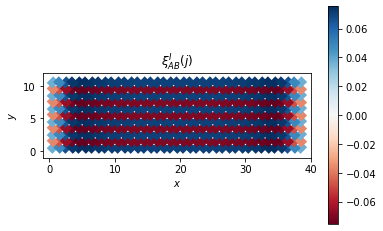

In [ ]:
fig  = plt.figure()
ax = fig.add_subplot()

segment, color, mini, maxi = tools.plot_bonds(un_mf.pos, un_mf.J_nn, np.imag(un_mf.mfhop_nn))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(mini, maxi),
                                linewidths=8, rasterized=True)
 
ax.set_xlim(-1,2*un_mf.nx)
ax.set_ylim(-1,2*un_mf.ny)
ax.add_collection(ligne)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(ligne)
ax.set_aspect('equal')
plt.title(r'$\xi_{AB}^I(j)$')
plt.show()

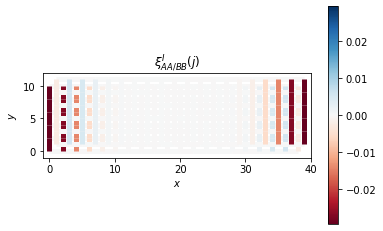

In [ ]:
fig  = plt.figure()
ax = fig.add_subplot()

aux = np.concatenate((np.imag(un_mf.mfhop_ax), np.imag(un_mf.mfhop_ay), np.imag(un_mf.mfhop_bx), np.imag(un_mf.mfhop_ax)))
maxi = np.amax(np.abs(aux))
segment, color, mini_, maxi_ = tools.plot_bonds(un_mf.pos, un_mf.J_ax, np.imag(un_mf.mfhop_ax))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(-maxi, maxi),
                                linewidths=5, rasterized=True)
ax.add_collection(ligne)
segment, color, mini_, maxi_ = tools.plot_bonds(un_mf.pos, un_mf.J_ay, -np.imag(un_mf.mfhop_ay))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(-maxi, maxi),
                                linewidths=5, rasterized=True)
ax.add_collection(ligne)

segment, color, mini_, maxi_ = tools.plot_bonds(un_mf.pos, un_mf.J_bx, -np.imag(un_mf.mfhop_bx))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(-maxi, maxi),
                                linewidths=5, rasterized=True)
ax.add_collection(ligne)

segment, color, mini_, maxi_ = tools.plot_bonds(un_mf.pos, un_mf.J_by, np.imag(un_mf.mfhop_by))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(-maxi, maxi),
                                linewidths=5, rasterized=True)
ax.add_collection(ligne)

ax.set_xlim(-1,2*un_mf.nx)
ax.set_ylim(-1,2*un_mf.ny)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_ylim()
fig.colorbar(ligne)
ax.set_aspect('equal')
plt.title(r'$\xi_{AA/BB}^I(j)$')
plt.show()

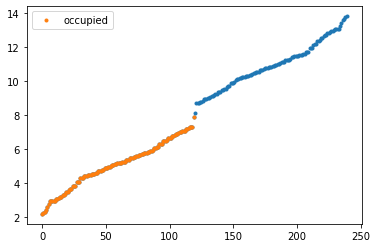

In [ ]:
plt.plot(un_mf.energies,'.')
plt.plot(un_mf.energies_fermi,'.', label='occupied')
plt.legend()